In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sys
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

Read the image and display it

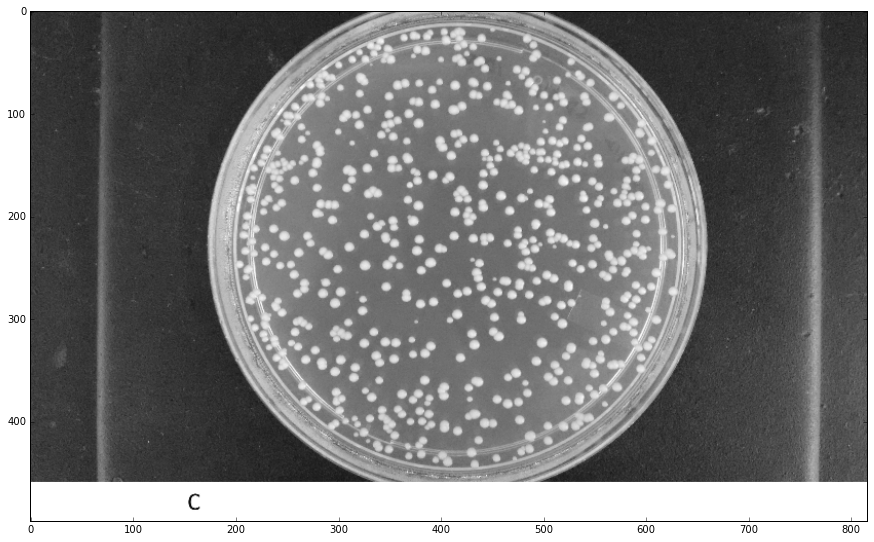

In [45]:
img = cv2.imread('images/set1/C_593.jpg', 0)
h, w = img.shape
if h > 600:
    img = cv2.resize(img, (w/4, h/4))
plt.imshow(img, cmap='gray')

Do the thresholding

In [46]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

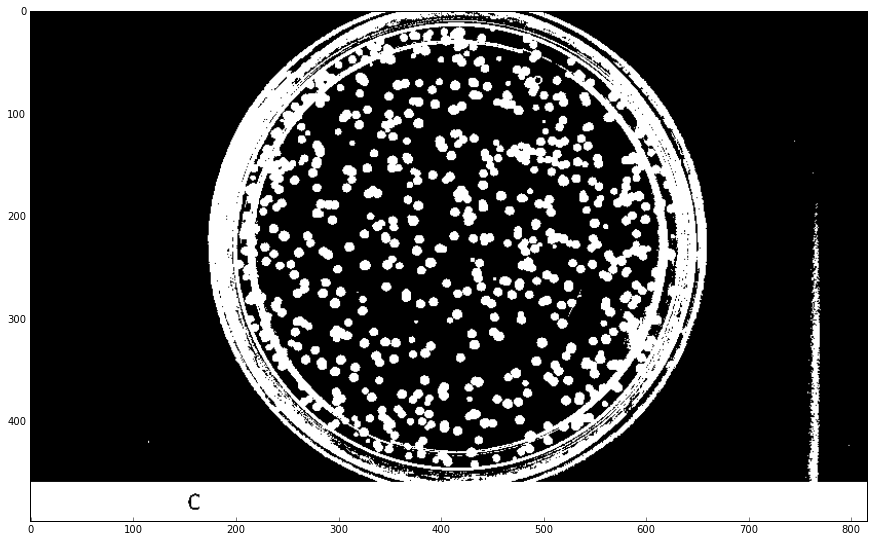

In [47]:
plt.imshow(thresh, cmap='gray')

Time to remove noise from the picture

In [50]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

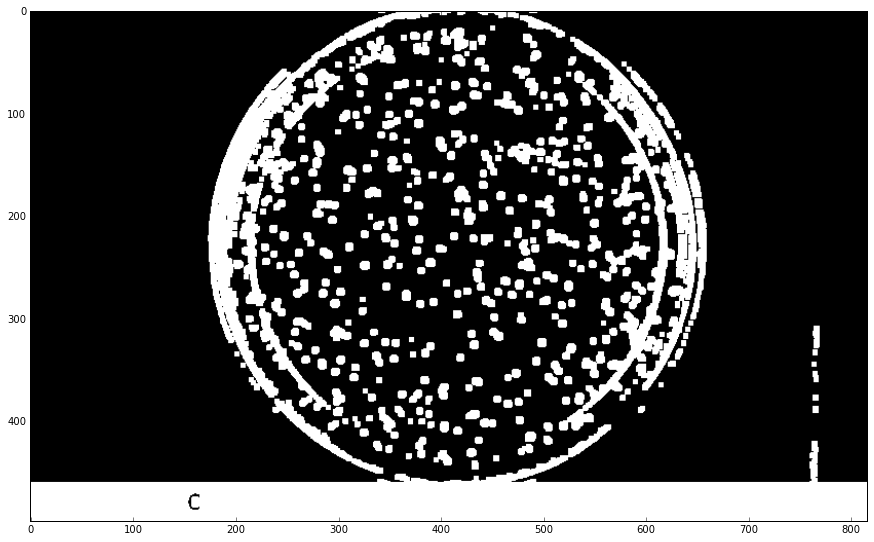

In [51]:
plt.imshow(opening, cmap='gray')

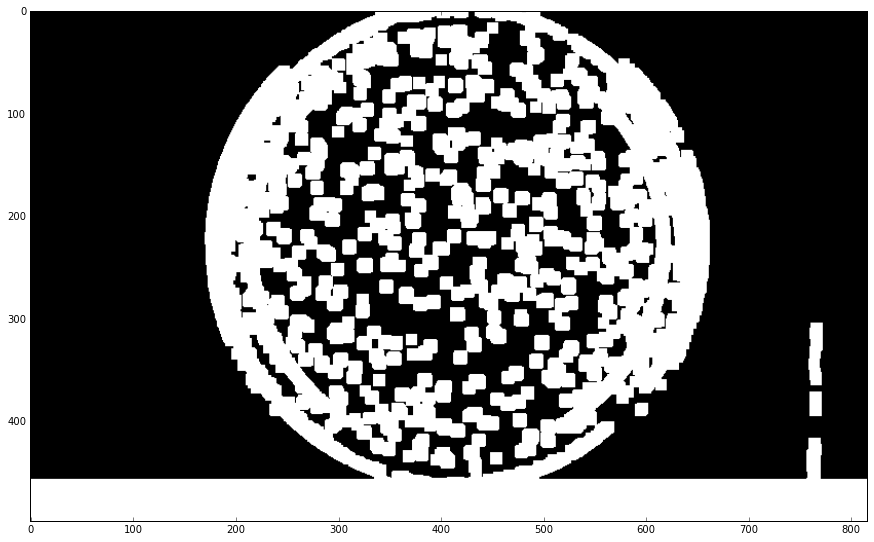

In [52]:
dilated_img = cv2.dilate(opening, kernel, iterations=3)
plt.imshow(dilated_img, cmap='gray')

Let's take a distance transform now, no idea what that is but we'll read up, when?

In [53]:
dist_transform = cv2.distanceTransform(dilated_img, cv2.cv.CV_DIST_L2, 5)

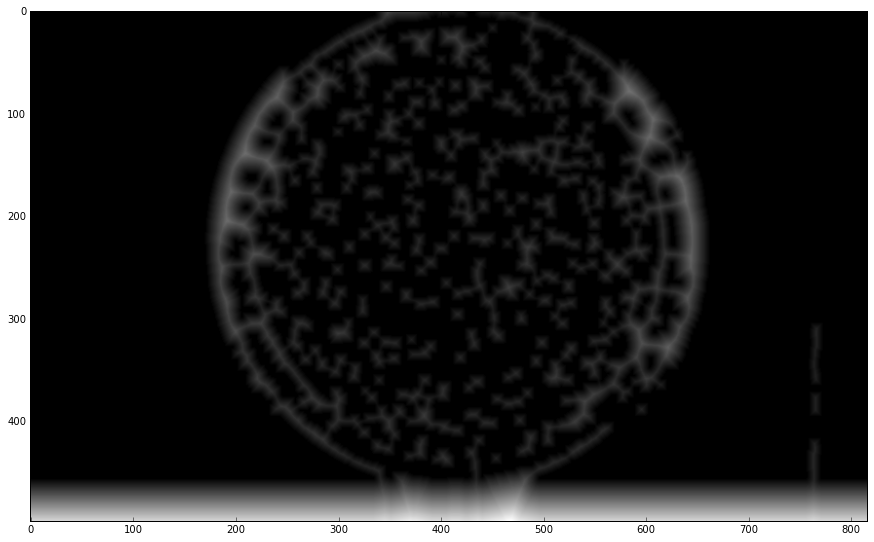

In [54]:
plt.imshow(dist_transform, cmap='gray')

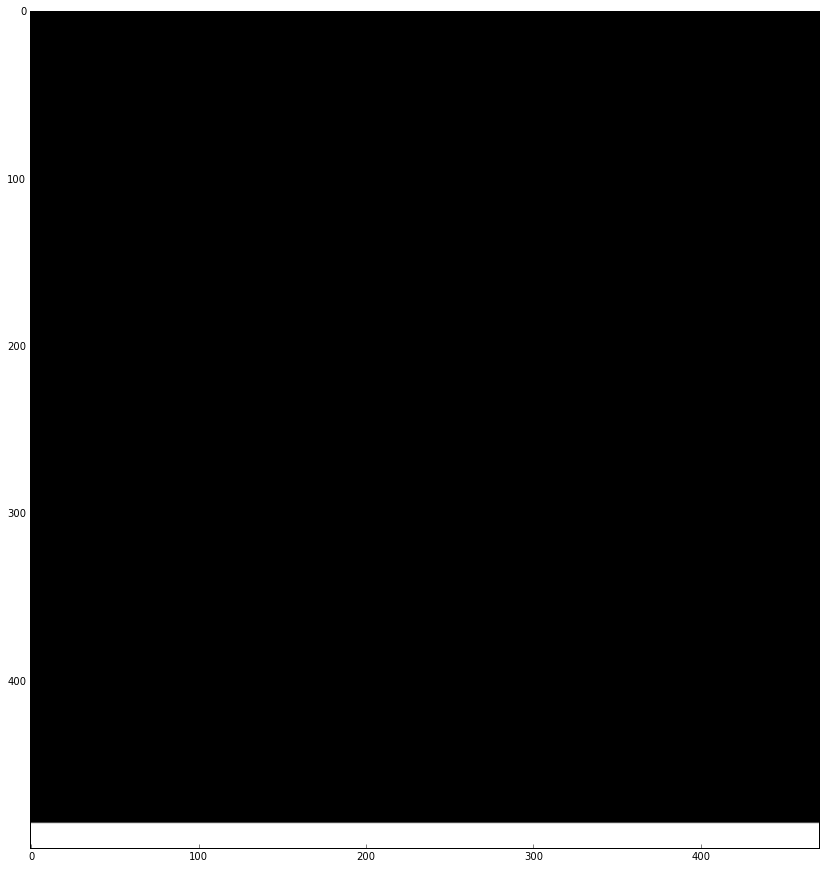

In [44]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap='gray')